## Imports

In [1]:
import os
import numpy as np
import cv2
from PIL import Image

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, r'E:\GitHub\smart-parking-system')

## Utils

In [2]:
def histogram_equalization(image: Image.Image):
    """
    Apply histogram equalization to a given image.
    :param image: An image.
    :return: The image after the histogram equalization as numpy array.
    """
    # Converting the image to grayscale if not in grayscale
    '''if not image.mode == 'L':
        print(f'Image mode is \"{image.mode}\". Converting to grayscale')
        image = image.convert('L')'''

    # Convert the image to an array to be used by skimage equalization function
    image = np.array(image)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(gray)

    return equalized

## Constants

In [3]:
segmented_path = r"E:\GitHub\smart-parking-system\dataset\license-plates\segmented"
image_name = "lpdr_sample_329_1.jpg"

## Character segmentation from license plates

### Read and display image

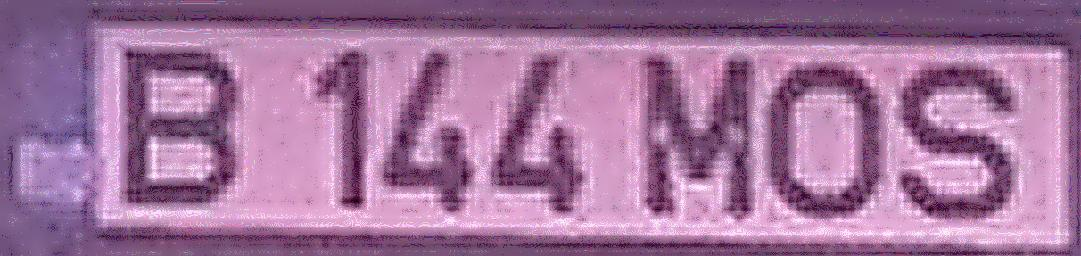

In [4]:
img = Image.open(os.path.join(segmented_path, image_name))
display(img)

### Do bounding box detection on that image

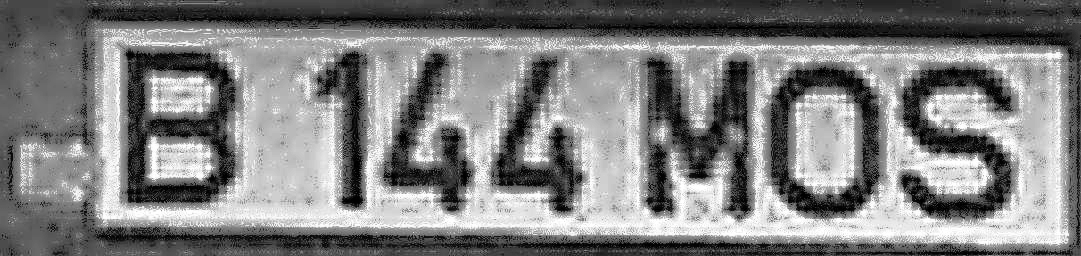

In [5]:
histogram_eq_image = histogram_equalization(img)
display(Image.fromarray(histogram_eq_image))

In [6]:
kernel = np.ones((5, 5), np.uint8)
img_dilation = cv2.dilate(histogram_eq_image, kernel, iterations=1)

_, threshold = cv2.threshold(img_dilation, 127, 255, cv2.THRESH_TOZERO)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE,
                               cv2.CHAIN_APPROX_SIMPLE)

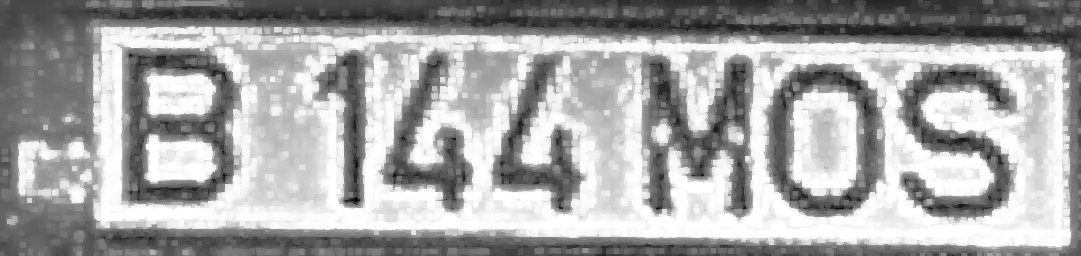

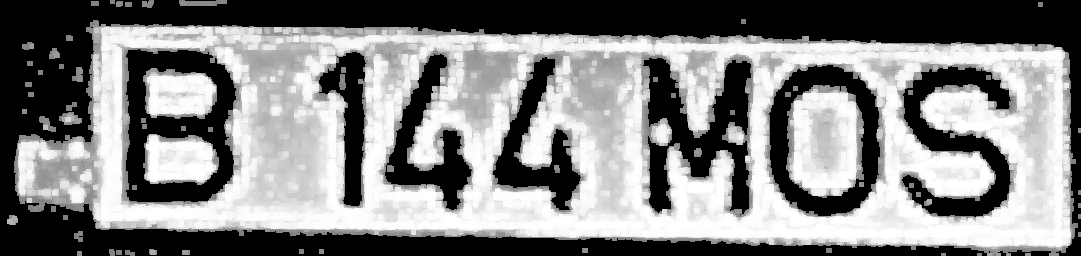

In [7]:
display(Image.fromarray(img_dilation))
display(Image.fromarray(threshold))

In [8]:
backtorgb = cv2.cvtColor(threshold,cv2.COLOR_GRAY2RGB)

In [9]:
areas = [cv2.contourArea(cnt) for cnt in contours]
max_area_idx = np.argmax(areas)
x, y = contours[max_area_idx].T
bbox = ((np.min(x), np.min(y)), (np.max(x), np.max(y)))

In [10]:
letters_bboxes = [areas.index(x) for x in sorted(areas, reverse=True)[:14]]
print(f'letters_bboxes is : {letters_bboxes}')
#letters_bboxes.remove(max_area_idx)
#print(f'letters_bboxes after removal is : {letters_bboxes}')

letters_bboxes is : [35, 61, 44, 49, 48, 38, 54, 57, 58, 63, 68, 23, 75, 22]


In [11]:
for idxs in letters_bboxes:
    x, y = contours[idxs].T
    bbox = ((np.min(x), np.min(y)), (np.max(x), np.max(y)))
    backtorgb = cv2.rectangle(backtorgb, bbox[0], bbox[1], (255, 0, 0), 1)

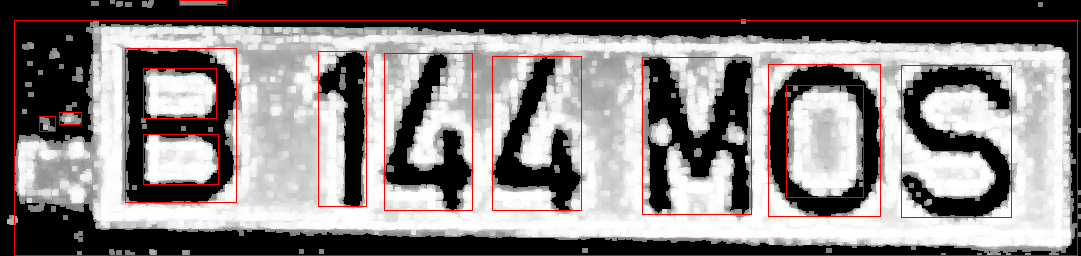

In [12]:
display(Image.fromarray(backtorgb))

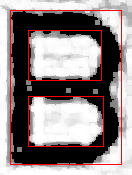

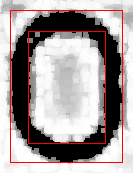

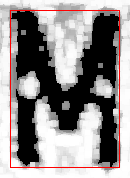

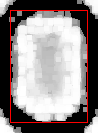

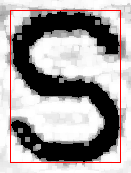

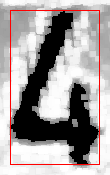

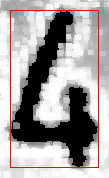

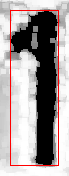

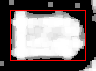

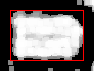

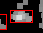

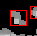

In [26]:
for idxs in letters_bboxes:
    x, y = contours[idxs].T
    bbox = ((np.min(x), np.min(y)), (np.max(x), np.max(y)))
    character = backtorgb[max(bbox[0][1]-10, 0) : min(bbox[1][1] + 11, backtorgb.shape[0]), 
                                     max(bbox[0][0]-10, 0) : min(bbox[1][0] + 11, backtorgb.shape[1])]
    display(Image.fromarray(character))

## Perform character segmentation on all license plates images

In [27]:
license_plates_path = r'E:\GitHub\smart-parking-system\dataset\license-plates\segmented'
characters_results_path = r'E:\GitHub\smart-parking-system\dataset\license-plates\characters'
images_names = os.listdir(license_plates_path)

In [28]:
for image in images_names:
    print(f' Image : {image}')
    sample = Image.open(os.path.join(license_plates_path, image))
    
    histogram_eq_image = histogram_equalization(sample)
    
    kernel = np.ones((5, 5), np.uint8)
    img_dilation = cv2.dilate(histogram_eq_image, kernel, iterations=1)

    _, threshold = cv2.threshold(img_dilation, 127, 255, cv2.THRESH_TOZERO)
    contours, _ = cv2.findContours(threshold, cv2.RETR_TREE,
                                   cv2.CHAIN_APPROX_SIMPLE)
    
    areas = [cv2.contourArea(cnt) for cnt in contours]
    max_area_idx = np.argmax(areas)
    
    characters_bboxes = [areas.index(x) for x in sorted(areas, reverse=True)[:14]]
    characters_bboxes.remove(max_area_idx)
    
    sample_backtorgb = cv2.cvtColor(threshold,cv2.COLOR_GRAY2RGB)
    
    for idx in characters_bboxes:
        x, y = contours[idx].T
        bbox = ((np.min(x), np.min(y)), (np.max(x), np.max(y)))
        character = sample_backtorgb[max(bbox[0][1]-10, 0) : min(bbox[1][1] + 11, sample_backtorgb.shape[0]), 
                                     max(bbox[0][0]-10, 0) : min(bbox[1][0] + 11, sample_backtorgb.shape[1])]
        Image.fromarray(character).save(os.path.join(characters_results_path, image.split(".")[0] + "_character" + str(idx) + ".jpg"))

 Image : lpdr_sample_100_0.jpg
 Image : lpdr_sample_101_0.jpg
 Image : lpdr_sample_103_1.jpg
 Image : lpdr_sample_104_0.jpg
 Image : lpdr_sample_105_0.jpg
 Image : lpdr_sample_105_2.jpg
 Image : lpdr_sample_106_0.jpg
 Image : lpdr_sample_107_0.jpg
 Image : lpdr_sample_111_0.jpg
 Image : lpdr_sample_112_0.jpg
 Image : lpdr_sample_113_0.jpg
 Image : lpdr_sample_115_0.jpg
 Image : lpdr_sample_115_1.jpg
 Image : lpdr_sample_116_1.jpg
 Image : lpdr_sample_117_0.jpg
 Image : lpdr_sample_117_1.jpg
 Image : lpdr_sample_117_2.jpg
 Image : lpdr_sample_118_1.jpg
 Image : lpdr_sample_119_0.jpg
 Image : lpdr_sample_123_0.jpg
 Image : lpdr_sample_124_0.jpg
 Image : lpdr_sample_125_0.jpg
 Image : lpdr_sample_126_0.jpg
 Image : lpdr_sample_127_0.jpg
 Image : lpdr_sample_129_0.jpg
 Image : lpdr_sample_129_1.jpg
 Image : lpdr_sample_131_1.jpg
 Image : lpdr_sample_132_0.jpg
 Image : lpdr_sample_132_1.jpg
 Image : lpdr_sample_133_1.jpg
 Image : lpdr_sample_135_0.jpg
 Image : lpdr_sample_135_1.jpg
 Image :